###################################### Section 0 ###########################################

## Read Data

In [1]:
import os
os.system("pip install pandas")
os.system("pip install matlab")
os.system("pip install seaborn")
os.system("pip install sklearn")
os.system("pip install mlxtend")
os.system("pip install statsmodels")
os.system("pip install plotly")
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sea
import statsmodels.api as sm
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)
import pandas as pd
url = 'https://raw.githubusercontent.com/shughestr/PIMS_2020_Real_Estate_data/master/sample_clean.csv'
df=pd.read_csv(url,encoding='latin1',delimiter=',')
df = df.dropna()


###################################### Section1.1 ###########################################

## Group Data by Area

In [2]:
Housing_group1=df.groupby('fsa')

## Price Percentage Change Comparison Among Different Areas


Text(0, 0.5, 'Price Percentage Change')

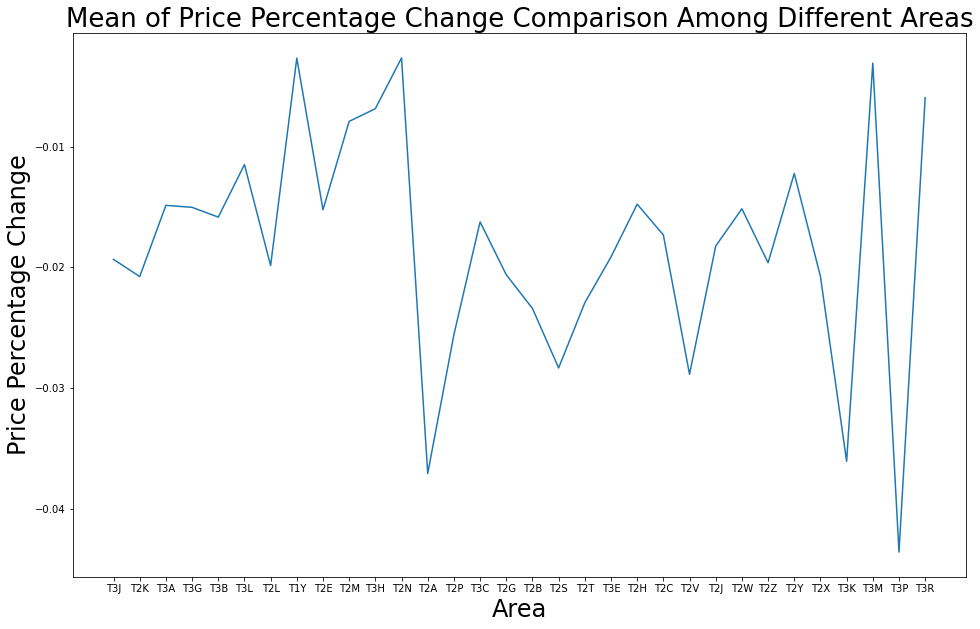

In [3]:
Area_mean=Housing_group1['pct_change'].mean()
Unique_Area=df['fsa'].unique()
Unique_Area=list(Unique_Area)
fig,ax=plt.subplots(1)
ax.set_title('Mean of Price Percentage Change Comparison Among Different Areas',fontdict={'fontsize':26})
ax.plot(Unique_Area,Area_mean)
ax.set_xlabel('Area',fontdict={'fontsize':24})
ax.set_ylabel('Price Percentage Change',fontdict={'fontsize':24})



## Price Percentage Change within Area


### Group Percentage_Change Data

In [4]:
pct_group=pd.qcut(df['pct_change'], q=4)
df['pct_group']=pct_group



### Create Frequency Table and Draw Barplot

Text(0, 0.5, 'Frequncy')

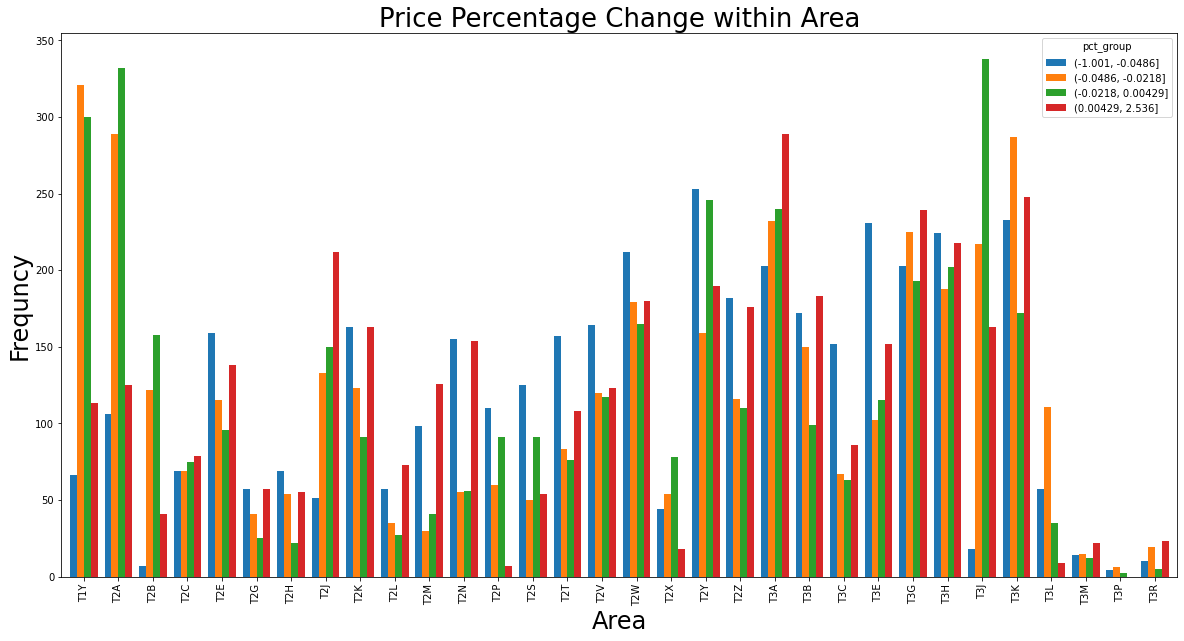

In [5]:
ax=pd.crosstab(df.fsa, df.pct_group).plot(kind='bar',width=0.8,figsize=[20,10])
ax.set_title('Price Percentage Change within Area',fontdict={'fontsize':26})
ax.set_xlabel('Area',fontdict={'fontsize':24})
ax.set_ylabel('Frequncy',fontdict={'fontsize':24})

##################################### Section1.2 ###########################################

## Group Data by Year

In [6]:
df.Year.unique()
Housing_group2=df.groupby('Year')

## Price Percentage Change Comparison Among Different Years

Text(0, 0.5, 'Price Percentage Change')

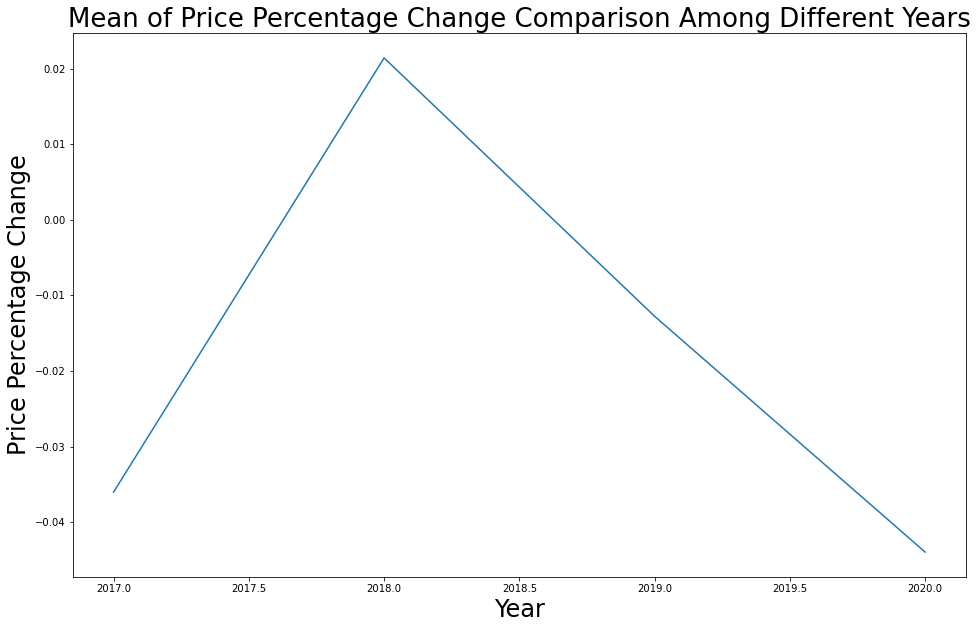

In [7]:
Year_mean=Housing_group2['pct_change'].mean()
Unique_Year=df['Year'].unique()
Unique_Year=list(Unique_Year)
fig,ax=plt.subplots(1)
ax.set_title('Mean of Price Percentage Change Comparison Among Different Years',fontdict={'fontsize':26})
ax.plot(Unique_Year,Year_mean)
ax.set_xlabel('Year',fontdict={'fontsize':24})
ax.set_ylabel('Price Percentage Change',fontdict={'fontsize':24})

## Price Percentage Change within Area

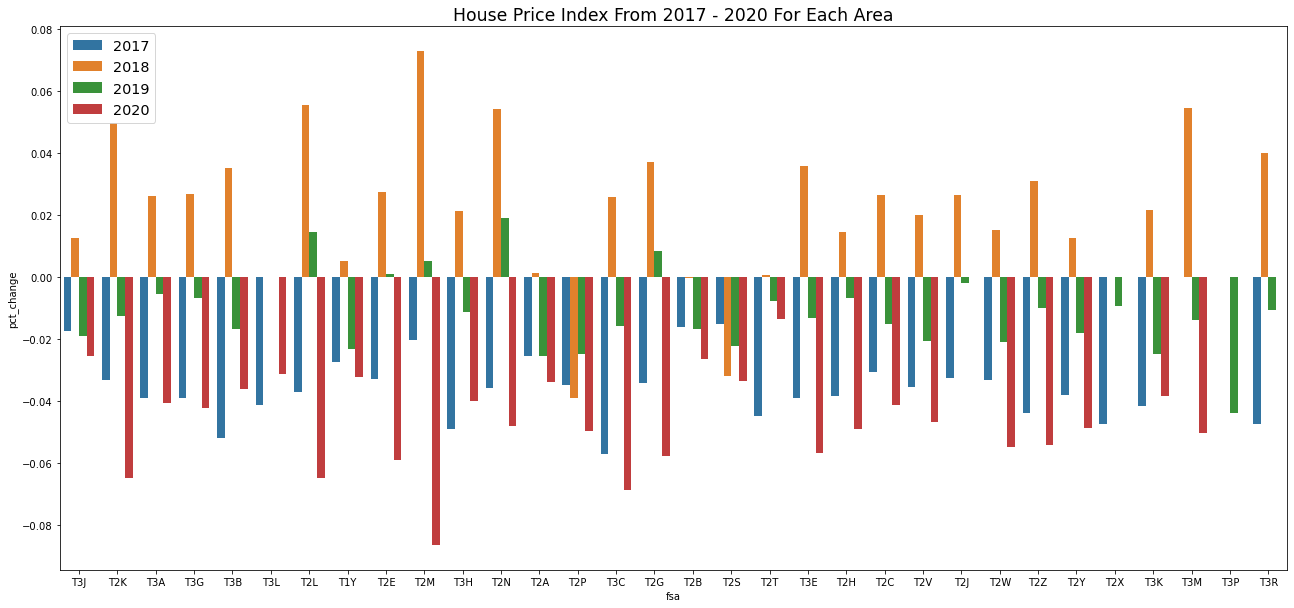

In [8]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title('House Price Index From 2017 - 2020 For Each Area', fontsize = 'xx-large')
sea.barplot(data = df, x = 'fsa', y = 'pct_change', hue = 'Year',ci=None)
ax.legend(['2017', '2018', '2019', '2020'], fontsize = 'x-large')



###################################### Section 2.1 ###########################################

## Divide the Dataset into three Small Dataset and draw heatmap

<AxesSubplot:>

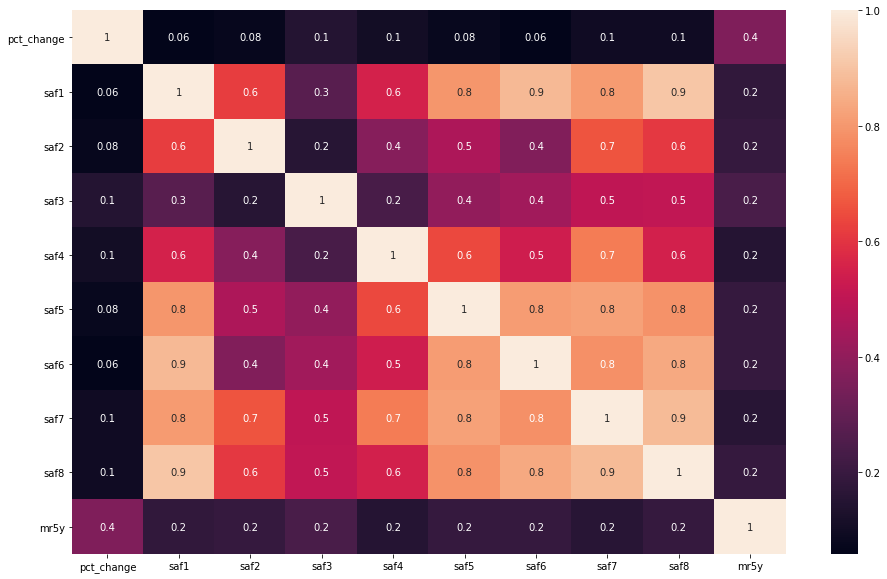

In [9]:
df1=df.copy()

df2=df1.drop(axis=1,columns=['ADDRESS','ASSESSED_VALUE','ASSESSMENT_CLASS','ASSESSMENT_CLASS_DESCRIPTION','COMM_NAME','COMM_CODE','LATITUDE','LONGITUDE','location','fsa','pct_group','ROLL_NUMBER','Year','YEAR_OF_CONSTRUCTION'])
df2=(df2-df2.mean())/df2.std()
df3 = pd.concat([df2['pct_change'],df2['saf1'],df2['saf2'],df2['saf3'],df2['saf4'],df2['saf5'],df2['saf6'],df2['saf7'],df2['saf8'],df2['mr5y']], axis=1)
df3.columns = ['pct_change','saf1','saf2','saf3','saf4','saf5','saf6','saf7','saf8','mr5y']
sea.heatmap(df3.corr(), annot = True, fmt='.1g')

###################################### Section 2.2 ###########################################

<AxesSubplot:>

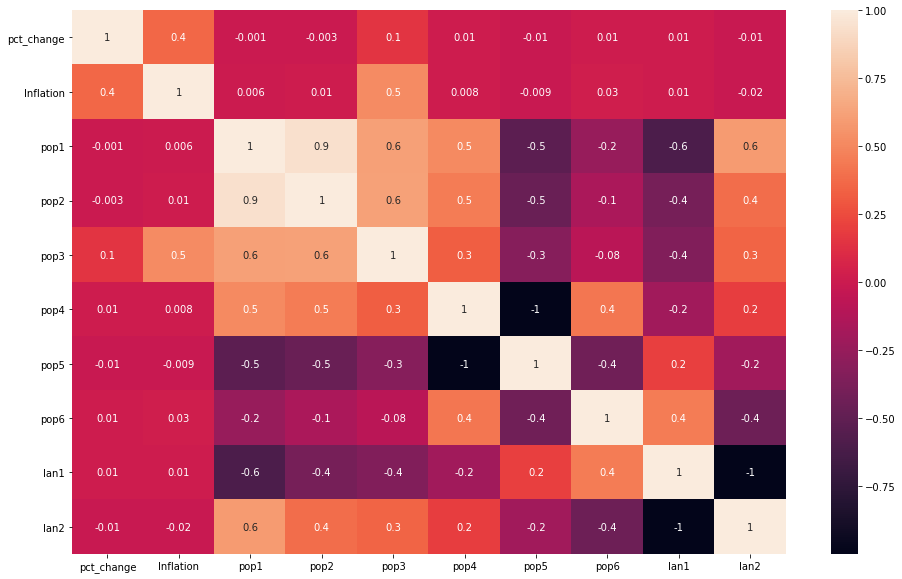

In [10]:
df4 = pd.concat([df2['pct_change'],df2['Inflation'],df2['pop1'],df2['pop2'],df2['saf3'],df2['pop4'],df2['pop5'],df2['pop6'],df2['lan1'],df2['lan2']], axis=1)
df4.columns = ['pct_change','Inflation','pop1','pop2','pop3','pop4','pop5','pop6','lan1','lan2']
sea.heatmap(df4.corr(), annot = True, fmt='.1g')

<AxesSubplot:>

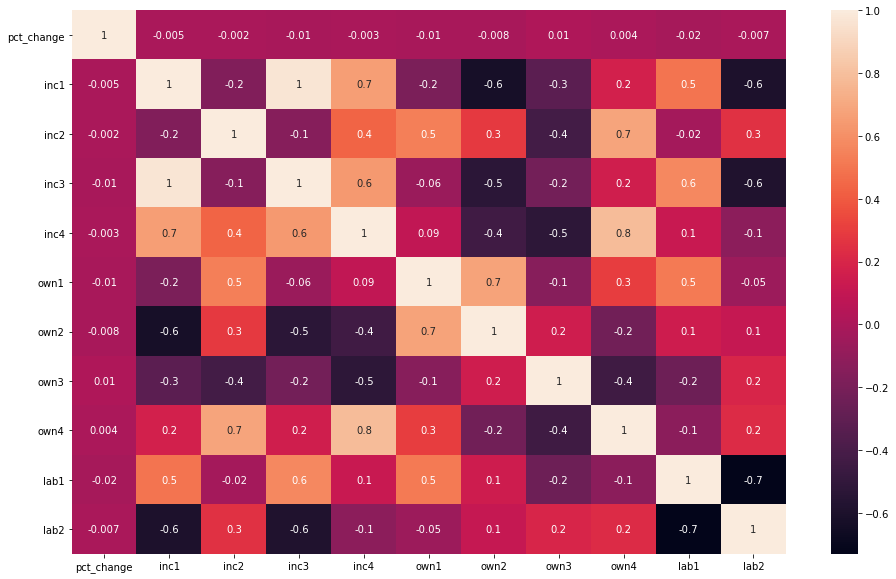

In [11]:
df5 = pd.concat([df2['pct_change'],df2['inc1'],df2['inc2'],df2['inc3'],df2['inc4'],df2['own1'],df2['own2'],df2['own3'],df2['own4'],df2['lab1'],df2['lab2']], axis=1)
df5.columns = ['pct_change','inc1','inc2','inc3','inc4','own1','own2','own3','own4','lab1','lab2']
sea.heatmap(df5.corr(), annot = True, fmt='.1g')

### According to the heatmap, inflation is highly correlated with pct_change

##################################### Section3.1 ########################################


## Feature Selections(Wrapper Methods)

### Forward variable selection

In [12]:
C2=df2.copy()
X_train, X_test, y_train, y_test = train_test_split(
    C2.values[:,:-1],
    C2.values[:,-1:],
    test_size=0.2,
    random_state=0)


clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 5,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)
feat_cols = list(sfs1.k_feature_idx_)
C2.columns[feat_cols]

Index(['lan1', 'own2', 'own3', 'lab1', 'lab2'], dtype='object')

### Backward variable selection

In [13]:
df_o=df2.copy()
y_o=df_o['pct_change']
X_o=df_o.drop(columns='pct_change')
#Fitting sm.OLS model
model = sm.OLS(y_o,X_o).fit()
model.pvalues

cols = list(X_o.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_o[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_o,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE[0:5])

['saf1', 'saf3', 'saf4', 'saf5', 'saf6']


##################################### Section3.2 ########################################



## Filter Method

### Anova and Regression

In [14]:
df_o=df2.copy()
y_o=df_o['pct_change']
X_o=df_o.drop(columns='pct_change')
fvalue_selector = SelectKBest(f_regression,k=5)
X_kbest = fvalue_selector.fit_transform(X_o, y_o)
fvalue_selector.get_support([X_o.shape[1]])
#X_new = fvalue_selector.transform(X_o)
X_o.columns[fvalue_selector.get_support(indices=True)]

Index(['saf3', 'saf4', 'saf7', 'mr5y', 'Inflation'], dtype='object')

##################################### Section4.1 ########################################

## Create A New Dataset 

### Find out the 0.5% and 99.5% quantile value of "ASSESSED_VALUE"

In [15]:
df.ASSESSED_VALUE.quantile([0.005,0.995])

0.005      10000.0
0.995    2580200.0
Name: ASSESSED_VALUE, dtype: float64

### Classify 'ASSESSED_VALUE' into three group---'P','M','R'

In [16]:
li=[]
for obser in df['ASSESSED_VALUE']:
    if obser>=2580200.0:
        li.append('R')
    elif obser<=10000.0:
        li.append('P')
    else:
        li.append('M')

### Create a new dataframe with the column of classification group('Community')of 'ASSESSED_VALUE '

In [17]:
df9=df2.copy()
data = {'Community':li}
data=pd.DataFrame(data)
df9['Community']=data
df9=pd.DataFrame(df9)

### Delete the rows of the new dataframe if Community'' is 'M'

In [18]:
df9 = df9[(df9['Community'] == 'R') | (df9['Community'] == 'P')]

##################################### Section4.2 ###########################################

## Using Anova to Find Out 5 Most Important Varaibles when Doing Classification

In [19]:
y9=df9['Community']
X9=df9.drop(axis=1,columns=['Community'])
fvalue_selector = SelectKBest(f_classif,k=5)
X_kbest = fvalue_selector.fit_transform(X9, y9)
fvalue_selector.get_support([X9.shape[1]])
#X_new = fvalue_selector.transform(X9)
X9.columns[fvalue_selector.get_support(indices=True)]

Index(['saf1', 'saf2', 'pop4', 'pop5', 'own4'], dtype='object')

##################################### Section4.3 ###########################################

## Classification Using Supporting Vector Machine(SVM)

### Creating another new dataset according to the 5 important variables  

In [20]:
classdf=pd.concat([X9['saf1'], X9['saf2'], X9['pop4'], X9['pop5'], X9['own4'],y9],axis=1)
classdf.columns = ['saf1', 'saf2', 'pop4', 'pop5', 'own4','community']
feature_cols = ['saf1', 'saf2', 'pop4', 'pop5', 'own4']
X = classdf[feature_cols] # Features
y = classdf.community # Target variable

### Split the dataset into training and testing dataset

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Use supporting vector machine(SVM)

In [22]:
classifier = svm.SVC(kernel='poly',degree=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))   

Accuracy: 0.9058823529411765


### Let us find out which ones are misclassified and why they are misspecified

#### Firstly,let us take a look at the rough plot

In [23]:
df12=pd.read_csv('/home/jovyan/binder/data1.csv',encoding='latin-1')
df12= df12.rename(columns={'ï»¿saf1': 'saf1'})




mesh_size = .02
margin = 1
df12_train, df12_test = train_test_split(df12, test_size=0.2, random_state=0)
print(df12_test['saf2'])
X12_train = df12_train[['saf1', 'saf2']]
y12_train = df12_train.community


l_min, l_max = df12.saf1.min() - margin, df12.saf1.max() + margin
w_min, w_max = df12.saf2.min() - margin, df12.saf2.max() + margin
lrange = np.arange(l_min, l_max, mesh_size)
wrange = np.arange(w_min, w_max, mesh_size)
#ll, ww = np.meshgrid(lrange, wrange)


#clf = svm.SVC(kernel='poly',degree=3)
#clf.fit(X_train, y_train)
#Z = clf.predict(np.c_[ll.ravel(), ww.ravel()])
#Z = Z.reshape(ll.shape)



fig = px.scatter(
    df12_test, x='saf1', y='saf2',
    symbol='community',
    symbol_map={
        'P': 'square-dot',
        'R': 'circle-dot',
        },
)

fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)



fig.add_trace(
    go.Heatmap(
        x=lrange,
        y=wrange,
        opacity=0.25,
        colorscale='RdBu',
        hovertemplate=(
            'saf1: %{x} <br>'
            'saf2: %{y} <br>'
        
        )
    )
)
fig.update_layout(
    legend_orientation='h',
    title='classification'
)
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/binder/data1.csv'

In [ ]:
dfh=pd.concat([df2,df['ASSESSED_VALUE']],axis=1)
sea.heatmap(dfh.corr(), annot = True, fmt='.1g')

#### (1)saf1:negatively correlated (2)saf2: positively correlated (3)pop4:positively correlated (4)pop5: positively correlated (5)own4:positively correlated

#### Secondly, let us take a look at the row indices of those misspecified data points

In [ ]:
y_test=list(y_test)
y_pred=list(y_pred)
P_to_R = [index for index, value in enumerate(y_test) if (y_test[index]=='P') & (y_pred[index]=='R')]
R_to_P = [index for index, value in enumerate(y_test) if (y_test[index]=='R') & (y_pred[index]=='P')]
P_to_R#index of those houses which should have been had low prices, but has predicted high prices
R_to_P#index of those houses which should have been had high prices, but has predicted low prices
print(R_to_P)

###### Data of those houses which should have been had high prices, but has predicted low prices

In [ ]:
X.iloc[[7, 32, 40, 57, 72, 74, 76]]

##### Why these house which should have been had high prices, but has low prices

##### We calculate the outlier boundary for those 5 important varaiables

In [ ]:
K=pd.DataFrame(X.describe())
two=K.iloc[4]
sev=K.iloc[6]
diff=sev-two
V1=list(two-1.5*diff)
V1[0]=0
V1[1]=0
V2=list(sev+1.5*diff)
dataset={'Outlier Lower Bound':V1,'Outlier Upper Bound':V2}
dataset=pd.DataFrame(dataset)
J=dataset.T
J.columns=['saf1', 'saf2', 'pop4', 'pop5', 'own4']
J.index=['Outlier Lower Bound','Outlier Upper Bound']
information=pd.concat([K,J])
information

##### The the reason comes out after comparison

In [ ]:
list5=['Each aspects of the house are okay','low saf2','low pop4,high pop5','low pop4,high pop5','low pop4,high pop5','low pop4,high pop5, own4','high pop5','high pop5','low saf2','high pop5']


In [ ]:
list6=[]
R=X.iloc[[7, 32, 40, 57, 72, 74, 76]]
H1={'property value depreciation reason':list6}
H1=pd.DataFrame(H1)
H1
R['Reasons']=H1
R=pd.DataFrame(R)
R.iloc[0,5]="low saf2,low own4"
R.iloc[1,5]="low safe2,low pop5"
R.iloc[2,5]="low own4"
R.iloc[3,5]="high saf1,low own4"
R.iloc[4,5]="high saf1"
R.iloc[5,5]="high saf1"
R.iloc[6,5]="high saf1"
print(R)
print('saf1:assault (Non-domestic)')
print('saf2:break & Enter - Commercial')
print('pop4:distribution (%) of the population by broad age groups, 0 to 14 years+65 years and over')
print('pop5:distribution (%) of the population by broad age groups, 15 to 64 years')
print('own4:owner households/(Total - Owner households + Total - Tenant households)')



#### Put the counts of each reason in a histogram


Text(0.5, 0, 'Reasons')

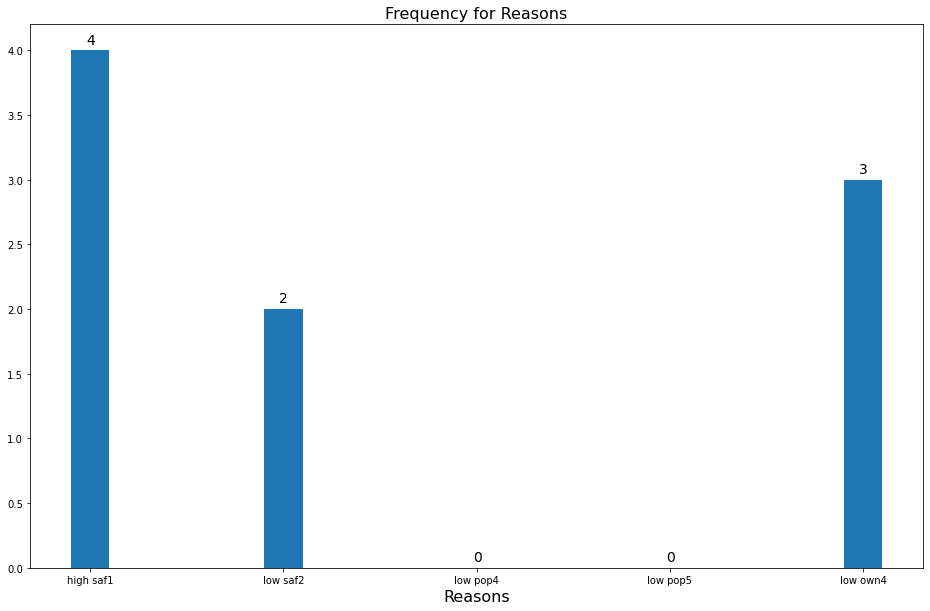

In [24]:
counts=[4,2,0,0,3]
counts={'Frequency':counts}
counts=pd.DataFrame(counts)
Reasons=['high saf1','low saf2','low pop4','low pop5','low own4']
Reasons={'Reasons':Reasons}
Reasons=pd.DataFrame(Reasons)
d1=pd.concat([Reasons,counts],axis=1)
bars = plt.bar(d1.Reasons, height=d1.Frequency, width=0.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.08, yval + .05, yval,fontsize=14)
plt.title('Frequency for Reasons',fontsize=16)
plt.xlabel('Reasons',fontsize=16)